In [84]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV

import hyperopt as ho

import functools

In [2]:
df = pd.read_csv('./WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.shape

(9134, 24)

In [5]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# Target - Customer Lifetime Value

<AxesSubplot:>

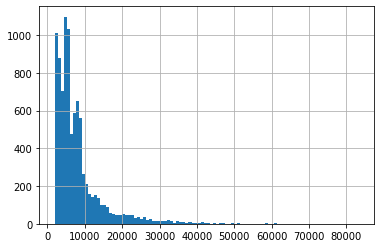

In [7]:
df['Customer Lifetime Value'].hist(bins=100)

<AxesSubplot:>

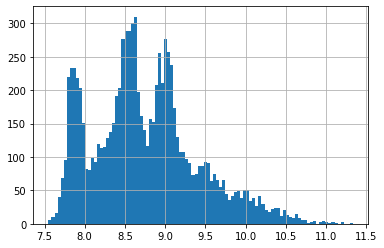

In [8]:
df['Customer Lifetime Value'].apply(np.log).hist(bins=100)

In [9]:
df['CLV_log'] = df['Customer Lifetime Value'].apply(np.log)

# Vehicle Size 

In [10]:
df['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [11]:
df['Vehicle Size'] = df['Vehicle Size'].map({'Small': 0, 'Medsize': 1, 'Large': 2})

# Vehicle Class

In [12]:
df['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [13]:
vehicle_class_dict = {'Two-Door Car': 0, 'Four-Door Car': 1, 
                      'SUV': 2, 'Sports Car': 3, 'Luxury Car': 4, 'Luxury SUV': 5}

In [14]:
df['Vehicle Class'] = df['Vehicle Class'].map(vehicle_class_dict)

# Total Claim Amount

<AxesSubplot:>

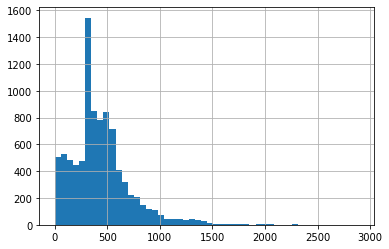

In [15]:
df['Total Claim Amount'].hist(bins=50)

<AxesSubplot:>

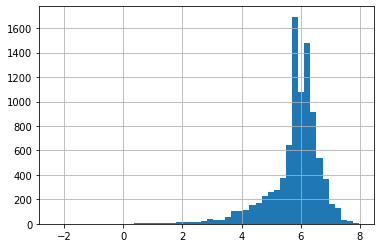

In [16]:
df['Total Claim Amount'].apply(np.log).hist(bins=50)

# Sales Channel

In [17]:
df['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [18]:
le = LabelEncoder()

In [19]:
df['Sales Channel'] = le.fit_transform(df['Sales Channel'])

In [20]:
df['Sales Channel'].value_counts()

0    3477
1    2567
2    1765
3    1325
Name: Sales Channel, dtype: int64

# Renew Offer Type

In [22]:
df['Renew Offer Type'].value_counts()

0    3752
1    2926
2    1432
3    1024
Name: Renew Offer Type, dtype: int64

In [21]:
df['Renew Offer Type'] = df['Renew Offer Type'].map({'Offer1': 0, 'Offer2': 1, 
                                                    'Offer3': 2, 'Offer4': 3})

# Policy

In [23]:
df['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [24]:
df['Policy'] = le.fit_transform(df['Policy'])

# Policy Type

In [25]:
df['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [26]:
df['Policy Type'] = le.fit_transform(df['Policy Type'])

# Number of Policies 

<AxesSubplot:>

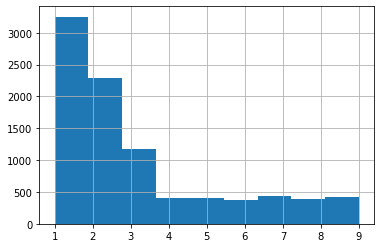

In [27]:
df['Number of Policies'].hist(bins=9)

# Number of Open Complaints

In [28]:
df['Number of Open Complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

In [29]:
df['Number of Open Complaints'].sum()

3511

<AxesSubplot:>

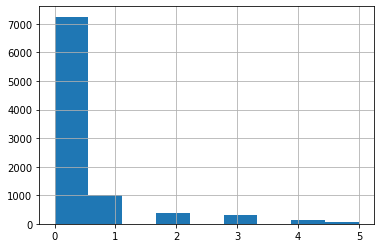

In [30]:
df['Number of Open Complaints'].hist(bins=9)

In [31]:
df['n_open_complaints_exceeds_one'] = (df['Number of Open Complaints'] > 1).astype(int)

<AxesSubplot:>

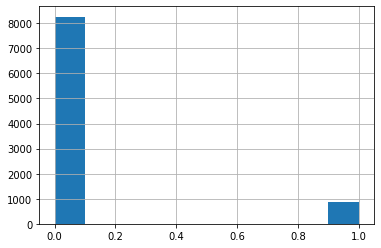

In [33]:
df['n_open_complaints_exceeds_one'].hist()

# Months Since Policy Inception

<AxesSubplot:>

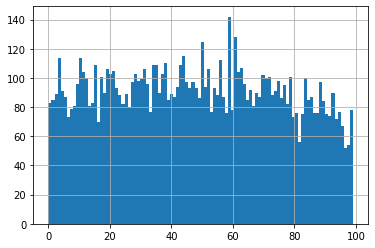

In [34]:
df['Months Since Policy Inception'].hist(bins=100)

# Months Since Last Claim

<AxesSubplot:>

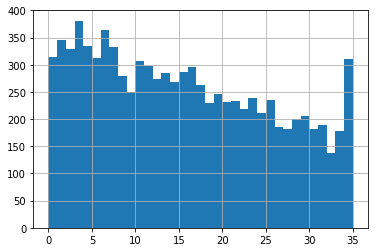

In [35]:
df['Months Since Last Claim'].hist(bins=35)

# Monthly Premium Auto

<AxesSubplot:>

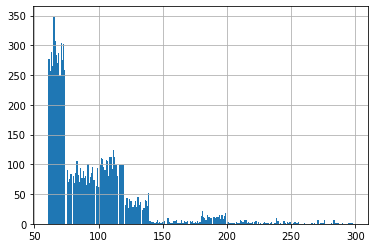

In [36]:
df['Monthly Premium Auto'].hist(bins=250)

# Marital Status  

In [37]:
df['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [39]:
df['Marital Status'] = le.fit_transform(df['Marital Status'])

# Gender

In [40]:
df['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [41]:
df['Gender'] = df['Gender'].map({'F': 1, 'M': 0})

# Employment status

In [42]:
df['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

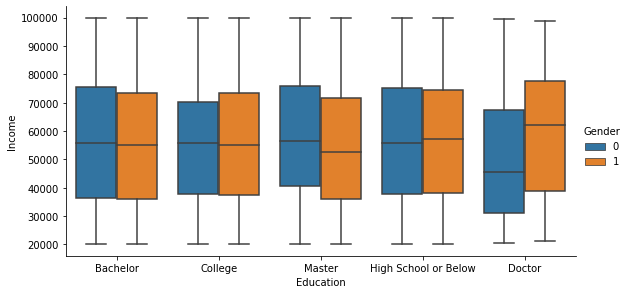

In [43]:
#only employed
mask_employed = df['EmploymentStatus'] == 'Employed'
sns.catplot(data=df[mask_employed], x='Education', y='Income', kind='box', hue='Gender', height=4, aspect=2)

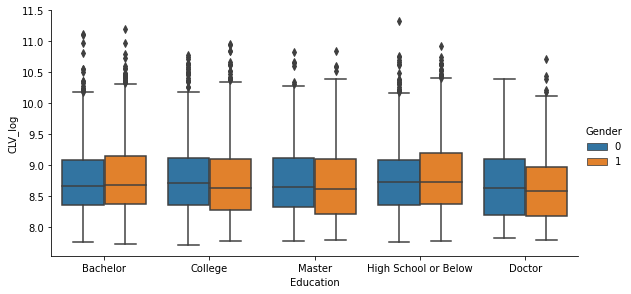

In [44]:
#only employed
sns.catplot(data=df[mask_employed], x='Education', y='CLV_log', kind='box', hue='Gender', height=4, aspect=2)

In [45]:
df['EmploymentStatus'] = le.fit_transform(df['EmploymentStatus'])

# Education

In [46]:
df['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [47]:
df[mask_employed].groupby('Education')['Income'].apply(np.mean)

Education
Bachelor                56456.954759
College                 55922.259615
Doctor                  55047.546185
High School or Below    57056.515707
Master                  56301.801802
Name: Income, dtype: float64

In [48]:
map_ed_dict = {'Bachelor': 0, 'College': 1, 'High School or Below': 2,
               'Master': 3, 'Doctor': 4}

In [49]:
df['Education'] = df['Education'].map(map_ed_dict)

# Effective To Date  

In [50]:
df['Effective To Date']

0       2/24/11
1       1/31/11
2       2/19/11
3       1/20/11
4        2/3/11
         ...   
9129    2/10/11
9130    2/12/11
9131     2/6/11
9132     2/3/11
9133    2/14/11
Name: Effective To Date, Length: 9134, dtype: object

# Coverage

In [51]:
df['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [52]:
df['Coverage'] = df['Coverage'].map({'Basic': 0, 'Extended': 1, 'Premium': 2})

# Response

In [53]:
df['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [54]:
df['Response'] = df['Response'].map({'No': 0, 'Yes': 1})

# Location code

In [55]:
df['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

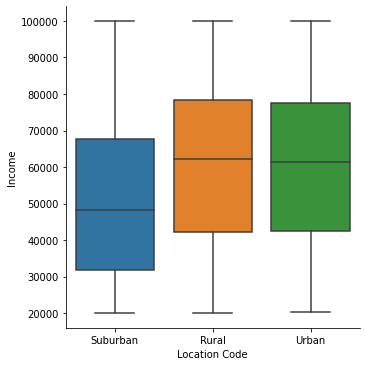

In [56]:
sns.catplot(x='Location Code', y='Income', data = df[mask_employed], kind='box')

In [57]:
df['Location Code'] = df['Location Code'].map({'Rural': 0, 'Suburban': 1, 'Urban': 2})

# State

In [58]:
df['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

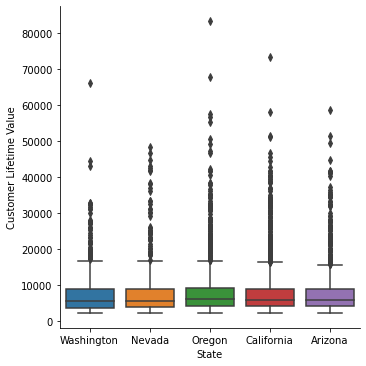

In [59]:
sns.catplot(x='State', y='Customer Lifetime Value', data = df[mask_employed], kind='box')

In [60]:
df['State'] = le.fit_transform(df['State'])

# Modeling

In [61]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV_log,n_open_complaints_exceeds_one
0,BU79786,4,2763.519279,0,0,0,2/24/11,1,1,56274,...,1,0,2,0,0,384.811147,0,1,7.924260,0
1,QZ44356,0,6979.535903,0,1,0,1/31/11,4,1,0,...,8,1,5,2,0,1131.464935,1,1,8.850738,0
2,AI49188,2,12887.431650,0,2,0,2/19/11,1,1,48767,...,2,1,5,0,0,566.472247,0,1,9.464008,0
3,WW63253,1,7645.861827,0,0,0,1/20/11,4,0,0,...,7,0,1,0,2,529.881344,2,1,8.941920,0
4,HB64268,4,2813.692575,0,0,0,2/3/11,1,0,43836,...,1,1,3,0,0,138.130879,1,1,7.942253,0


In [62]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'CLV_log',
       'n_open_complaints_exceeds_one'],
      dtype='object')

In [65]:
features = ['State', 
            'Response', 
            'Coverage',
            'Education', 
             #'Effective To Date', 
            'EmploymentStatus', 
            'Gender',
            'Income', 
            'Location Code', 
            'Marital Status', 
            'Monthly Premium Auto',
            'Months Since Last Claim', 'Months Since Policy Inception',
            #'Number of Open Complaints', #superseded by 'n_open_complaints_exceeds_one'
            'n_open_complaints_exceeds_one',
            'Number of Policies', 'Policy Type',
            'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
            'Vehicle Class', 'Vehicle Size']

In [66]:
X = df[features]
y = df['Customer Lifetime Value']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [69]:
def calc_mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean( np.abs( (y_true - y_pred)/y_true ) )

metrics = {
           'MSE': mean_squared_error,
           'MAE': mean_absolute_error,
           'MAPE': calc_mape,
           'R2': r2_score
          }

def get_metrics(y_true, y_pred):
    output = {}
    for mname, metric in metrics.items():
        print(mname, metric(y_true, y_pred))
        output[mname] = metric(y_true, y_pred)
    return output

In [72]:
regressors = {
          'skl': GradientBoostingRegressor(),
          'xgb': XGBRegressor(),
          'cat': CatBoostRegressor(silent=True),
          'lgbm': LGBMRegressor(),
         }

In [73]:
results = {}
for key, model in regressors.items():
    print(key)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = get_metrics(y_test, y_pred)
    results[key] = res

skl
MSE 16416257.703397103
MAE 1773.0238575791382
MAPE 0.14894837000222913
R2 0.669124895258856
xgb
MSE 17301559.221598454
MAE 1922.2372761586598
MAPE 0.19482615606914921
R2 0.6512813502893013
cat
MSE 15812756.578088576
MAE 1810.4328130190145
MAPE 0.16709819568163592
R2 0.6812886600861184
lgbm
MSE 16514224.948092593
MAE 1679.049357258003
MAPE 0.1339362946382542
R2 0.6671503330330746


In [74]:
result_df = pd.DataFrame.from_dict(results)

In [75]:
result_df

,skl,xgb,cat,lgbm
MSE,1.641626e+07,1.730156e+07,1.581276e+07,1.651422e+07
MAE,1.773024e+03,1.922237e+03,1.810433e+03,1.679049e+03
MAPE,1.489484e-01,1.948262e-01,1.670982e-01,1.339363e-01
R2,6.691249e-01,6.512814e-01,6.812887e-01,6.671503e-01


In [112]:
#similar performance for all models, slightly better MSE & R2 for CatBoost out of the box

# Hyperparam tuning with Grid Search

In [77]:
parameters = {
              'subsample': [0.66, 0.8, 1.0], 
              'n_estimators': [50, 75, 100, 150, 200], 
              'max_depth': [1, 2, 3, 4, 5],
              'learning_rate': [0.1, 0.15, 0.2],
             }

In [78]:
models_tuned = {
                'skl': GradientBoostingRegressor(),
                'xgb': XGBRegressor(),
                'cat': CatBoostRegressor(),
                'lgbm': LGBMRegressor(),
               }

In [79]:
#neg_mean_squared_error - the higher, the better, following the scoring convention
grid_search_models = {k: GridSearchCV(m, parameters, scoring='neg_mean_squared_error', n_jobs=2) 
                      for k, m in models_tuned.items()}

In [85]:
%%capture capt
for k, m in grid_search_models.items():
    m.fit(X, y)

In [88]:
grid_search_models['skl'].best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}

In [89]:
best_params_dict = {k: grid_search_models[k].best_params_ for k in models_tuned}

In [90]:
best_params_df = pd.DataFrame.from_dict(best_params_dict)

In [91]:
#'optimal' hyperparameters with some limited grid search
best_params_df 

,skl,xgb,cat,lgbm
learning_rate,0.1,0.1,0.15,0.10
max_depth,4.0,5.0,5.00,5.00
n_estimators,150.0,100.0,200.00,75.00
subsample,0.8,1.0,1.00,0.66


In [ ]:
#fit and test once again with the tuned params

In [128]:
skl_optimized = GradientBoostingRegressor(**grid_search_models['skl'].best_params_)
xgb_optimized = XGBRegressor(**grid_search_models['xgb'].best_params_)
cat_optimized = CatBoostRegressor(**grid_search_models['cat'].best_params_)
lgbm_optimized = LGBMRegressor(**grid_search_models['lgbm'].best_params_)

In [129]:
regressors_optimized =  {'skl': skl_optimized, 
                         'xgb': xgb_optimized, 
                         'cat': cat_optimized, 
                         'lgbm': lgbm_optimized}

In [130]:
results_optimized = {}
for key, model in regressors_optimized.items():
    print(key)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    res = get_metrics(y_test, y_pred)
    results_optimized[key] = res

skl
MSE 16536399.782315934
MAE 1839.373775914637
MAPE 0.1643299071308917
R2 0.6667033919135559
xgb
MSE 16142667.070485521
MAE 1726.4257383015986
MAPE 0.144305037743745
R2 0.6746392049728223
cat
0:	learn: 6145.4592608	total: 3.1ms	remaining: 617ms
1:	learn: 5631.3090846	total: 7.05ms	remaining: 698ms
2:	learn: 5226.4250349	total: 9.64ms	remaining: 633ms
3:	learn: 4908.8524756	total: 12.5ms	remaining: 613ms
4:	learn: 4648.4836121	total: 15.9ms	remaining: 618ms
5:	learn: 4435.5364582	total: 18.4ms	remaining: 594ms
6:	learn: 4273.2325187	total: 21.9ms	remaining: 605ms
7:	learn: 4148.0588033	total: 24.5ms	remaining: 589ms
8:	learn: 4048.8560542	total: 27.9ms	remaining: 592ms
9:	learn: 3969.7700125	total: 30.7ms	remaining: 584ms
10:	learn: 3903.0305848	total: 33.6ms	remaining: 578ms
11:	learn: 3867.7572833	total: 36.9ms	remaining: 577ms
12:	learn: 3830.4614230	total: 39.5ms	remaining: 568ms
13:	learn: 3791.6529656	total: 43ms	remaining: 572ms
14:	learn: 3763.4835115	total: 45.8ms	remaining: 

160:	learn: 3079.6195734	total: 526ms	remaining: 127ms
161:	learn: 3074.9771431	total: 532ms	remaining: 125ms
162:	learn: 3071.4199965	total: 536ms	remaining: 122ms
163:	learn: 3065.6147019	total: 540ms	remaining: 119ms
164:	learn: 3063.0314071	total: 544ms	remaining: 115ms
165:	learn: 3059.9078138	total: 548ms	remaining: 112ms
166:	learn: 3056.4351837	total: 552ms	remaining: 109ms
167:	learn: 3054.2317293	total: 555ms	remaining: 106ms
168:	learn: 3049.9056791	total: 560ms	remaining: 103ms
169:	learn: 3049.0609550	total: 563ms	remaining: 99.4ms
170:	learn: 3047.2582318	total: 571ms	remaining: 96.9ms
171:	learn: 3043.6229649	total: 584ms	remaining: 95.1ms
172:	learn: 3041.3610735	total: 587ms	remaining: 91.7ms
173:	learn: 3035.4608571	total: 590ms	remaining: 88.2ms
174:	learn: 3034.8840805	total: 593ms	remaining: 84.7ms
175:	learn: 3033.5594659	total: 596ms	remaining: 81.3ms
176:	learn: 3029.6250852	total: 600ms	remaining: 77.9ms
177:	learn: 3028.6132994	total: 607ms	remaining: 75ms
178

In [131]:
result_optimized_df = pd.DataFrame.from_dict(results_optimized)

In [133]:
#after hyperparameter optimization:
result_optimized_df

,skl,xgb,cat,lgbm
MSE,1.653640e+07,1.614267e+07,1.556479e+07,1.622770e+07
MAE,1.839374e+03,1.726426e+03,1.822455e+03,1.715329e+03
MAPE,1.643299e-01,1.443050e-01,1.638725e-01,1.369453e-01
R2,6.667034e-01,6.746392e-01,6.862865e-01,6.729254e-01


In [134]:
#before hyperparameter optimization:
result_df

,skl,xgb,cat,lgbm
MSE,1.641626e+07,1.730156e+07,1.581276e+07,1.651422e+07
MAE,1.773024e+03,1.922237e+03,1.810433e+03,1.679049e+03
MAPE,1.489484e-01,1.948262e-01,1.670982e-01,1.339363e-01
R2,6.691249e-01,6.512814e-01,6.812887e-01,6.671503e-01


In [100]:
#Conclusion - MSE (grid search optimization objective) 
#is indeed improved for all models
#CatBoost gives the best MSE!

# Hyperparam search with hyperopt

In [ ]:
#adapted from
#https://medium.com/district-data-labs/parameter-tuning-with-hyperopt-faa86acdfdce

In [155]:
subsample_list = [0.66, 0.8, 1.0]
n_estimators_list = [50, 75, 100, 150, 200]
max_depth_list = [1, 2, 3, 4, 5]
learning_rate_list = [0.1, 0.15, 0.2]
param_dict_ho = {'subsample': subsample_list, 'n_estimators': n_estimators_list,
                 'max_depth': max_depth_list, 'learning_rate': learning_rate_list}

In [135]:
hyperparam_space = {
    'subsample': ho.hp.choice('subsample', subsample_list),
    'n_estimators': ho.hp.choice('n_estimators', n_estimators_list),
    'max_depth': ho.hp.choice('max_depth', max_depth_list),
    'learning_rate': ho.hp.choice('learning_rate', learning_rate_list),
}

In [136]:
#f is to be minimized
#therefore, negating 'neg_mean_squared_error'
#to get back to normal mse
def f(classifier, params, scoring='neg_mean_squared_error'):
    if classifier=='cat':
        clf = CatBoostRegressor(**params)
    elif classifier=='lgbm':
        clf = LGBMRegressor(**params)
    elif classifier=='xgb':
        clf = XGBRegressor(**params)
    elif classifier=='skl':
        clf = GradientBoostingRegressor(**params)
    else:
        print('Unknown classifier')
        raise ValueError
    obj_ = -1.0 * cross_val_score(clf, X, y, scoring=scoring).mean()
    return {'loss': obj_, 'status': ho.STATUS_OK}

In [137]:
regressors = ['skl', 'xgb', 'cat', 'lgbm']

In [138]:
functions_to_min = [functools.partial(f, r) for r in regressors]

In [140]:
%%capture capt
best_s = []
for f_custom in functions_to_min:
    best = ho.fmin(f_custom, hyperparam_space, algo=ho.tpe.suggest, max_evals=80)
    best_s.append(best)
    #print('best:', best)

In [141]:
print(best_s)

[{'learning_rate': 0, 'max_depth': 4, 'n_estimators': 3, 'subsample': 1}, {'learning_rate': 0, 'max_depth': 4, 'n_estimators': 2, 'subsample': 2}, {'learning_rate': 1, 'max_depth': 4, 'n_estimators': 4, 'subsample': 0}, {'learning_rate': 0, 'max_depth': 4, 'n_estimators': 1, 'subsample': 2}]


In [ ]:
#okay, hyperopt returns indices of best params
#and not the params themselves
#https://github.com/hyperopt/hyperopt/issues/492

In [159]:
for set_ in best_s:
    for k,v in set_.items():
        set_[k] = param_dict_ho[k][v]

In [161]:
#hyperopt best params:
print(best_s)

[{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}, {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}, {'learning_rate': 0.15, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.66}, {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 75, 'subsample': 1.0}]


In [169]:
best_params_hyperopt_df = pd.DataFrame(best_s, index=regressors).T

In [170]:
#'optimal hyperparameters' with HyperOpt
best_params_hyperopt_df

,skl,xgb,cat,lgbm
learning_rate,0.1,0.1,0.15,0.1
max_depth,5.0,5.0,5.00,5.0
n_estimators,150.0,100.0,200.00,75.0
subsample,0.8,1.0,0.66,1.0


In [162]:
#reminder: 'optimal' hyperparameters with some limited grid search
best_params_df 

,skl,xgb,cat,lgbm
learning_rate,0.1,0.1,0.15,0.10
max_depth,4.0,5.0,5.00,5.00
n_estimators,150.0,100.0,200.00,75.00
subsample,0.8,1.0,1.00,0.66
